**The Workflow**

    1.Define the problem and assemble a dataset
    2.Choose a measure of success
    3.Decide on an evaluation metric
    4.Prepare the data
    5.Develop a model that performs better than the a baseline
    6.Develop a model that overfits
    

## Define the problem and assemble data

Use a decision tree model to predict whether mushrooms are poisonous or edible.
The dataset includes descriptions of 23 species of gilled mushrooms in the Agaricus and Lepiota Family.
Each species is identified as either edible or poisonous.

### Import the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('agaricus-lepiota.data')
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


## 2.Choose a measure of success

*In this task, we consider success to be that the individual*
*should not eat a poisenous mushroom at all. Precision will be used as our measure of success.*


## 3.Prepare the data

In [3]:
df.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

#### renaming columns

In [4]:
df = df.rename(columns= {'p':'classes', 'x':'cap-shape', 's':'cap-surface', 'n':'cap-color', 't':'bruises?', 
                         'p.1':'odor', 'f':'gill-attachment', 
                         'c':'gill-spacing', 'n.1':'gill-size', 'k':'gill-color', 'e':'stalk-shape', 'e.1':'stalk-root', 
                         's.1':'stalk-surface-above-ring','s.2':'stalk-surface-below-ring', 'w':'stalk-color-above-ring', 
                         'w.1':'stalk-color-below-ring', 'p.2':'veil-type', 
                         'w.2':'veil-color', 'o':'ring-number', 'p.3':'ring-type', 'k.1':'spore-print-color',
                         's.3':'population', 'u':'habitat'})

In [5]:
df = df.replace({'?':np.NaN})

In [6]:
df.isnull().sum()

classes                        0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [7]:
print(df['stalk-root'].value_counts())

b    3776
e    1119
c     556
r     192
Name: stalk-root, dtype: int64


*There are various ways to handle missing values of categorical data.*

    -Ignore observations of missing values if we are dealing with large data sets
     and less number of records has missing values
    -Ignore variable, if it is not significant
    -Develop model to predict missing values
    -Treat missing data as just another category

*For this case, the missing values will be represented as another category*

In [8]:
df['stalk-root'] = df['stalk-root'].replace(np.NaN,'n')

In [9]:
print(df['stalk-root'].value_counts())

b    3776
n    2480
e    1119
c     556
r     192
Name: stalk-root, dtype: int64


In [10]:
data = df.drop('classes',axis=1)

In [11]:
data = pd.get_dummies(data,drop_first = True)


## 4.Develop a model that performs better than the a baseline

 To make a base model prediction,use the mode of the classes

In [12]:
df['classes'].value_counts()

e    4208
p    3915
Name: classes, dtype: int64

### Use a decision tree model to predict whether mushrooms are poisonous or edible

### 1. Split your data into train and test sets

In [13]:
X = data
y =df.classes

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6498, 95)
(6498,)
(1625, 95)
(1625,)


In [16]:
X_train.describe()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,...,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000
mean,0.000616,0.392582,0.103109,0.003693,0.447215,0.000462,0.315943,0.398430,0.005848,0.184980,...,0.050939,0.150816,0.494460,0.212219,0.267159,0.102493,0.035549,0.141890,0.044321,0.024161
std,0.024805,0.488363,0.304124,0.060666,0.497244,0.021483,0.464926,0.489613,0.076254,0.388311,...,0.219890,0.357897,0.500008,0.408911,0.442510,0.303319,0.185178,0.348964,0.205824,0.153562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
majority_class = y_train.mode()[0]
baseline_predictions = [majority_class] * len(y_train)


### How accurate our baseline model is

In [18]:
from sklearn.metrics import accuracy_score
majority_class_accuracy = accuracy_score(baseline_predictions,y_train)
print(majority_class_accuracy)

0.5167743921206525


The base model is about 52% accurate. 

**We now fit our model with the training data and see if we can get a better accuracy than that of the base model.**

In [19]:
feature_list = list(X_train.columns)

In [20]:
model = DecisionTreeClassifier(random_state=47)
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=47, splitter='best')

In [21]:
predictions1 = model.predict(X_test)
predictions = model.predict(X_train)
accuracy_score(y_test,predictions1)

1.0

*The model has 100% accuracy. This means that the model is definately overfitting.*
*We can try for a model that is not overfitting by changing the depth of the tree model.*
*Decreasing the depth might make a less complex model and avoid overfitting.*

### 3. What are the factors that predict whether a mushroom is poisonous? 

In [22]:
importances = list(model.feature_importances_)

In [23]:
feature_importances = list(zip(feature_list, importances))
features_importance = pd.DataFrame(feature_importances,columns = ['features','importance'])
n_features = features_importance[features_importance['importance']==0.000]
not_important = features_importance[features_importance['importance']==0.000].index


In [24]:
features_importance = features_importance.drop(not_important,axis=0)
print(features_importance)

                      features  importance
0                  cap-shape_c    0.000615
5                cap-surface_g    0.001841
17                  bruises?_t    0.011543
20                      odor_l    0.009680
22                      odor_n    0.620739
27              gill-spacing_w    0.002514
28                 gill-size_n    0.005977
41                stalk-root_c    0.178122
50  stalk-surface-below-ring_y    0.094289
74                 ring-type_n    0.015606
80         spore-print-color_r    0.034725
81         spore-print-color_u    0.024349


In [25]:
X_train1 = X_train[['cap-surface_g','odor_l','odor_n','gill-spacing_w','gill-size_n','stalk-shape_t','stalk-root_c',
              'stalk-surface-below-ring_y','stalk-color-below-ring_y','ring-number_o','spore-print-color_r',
              'spore-print-color_u','population_c']]

In [26]:
X_train1.shape

(6498, 13)

In [27]:
y_train.shape

(6498,)

In [28]:
X_test1 = X_test[['cap-surface_g','odor_l','odor_n','gill-spacing_w','gill-size_n','stalk-shape_t','stalk-root_c',
              'stalk-surface-below-ring_y','stalk-color-below-ring_y','ring-number_o','spore-print-color_r',
              'spore-print-color_u','population_c']]

In [29]:
X_test1.shape

(1625, 13)

# Evaluating Model

### 4. Report the accuracy of your model on the training set and on the test set. 

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions1))
print("Accuracy:",metrics.accuracy_score(y_train, predictions))

Accuracy: 1.0
Accuracy: 1.0


In [31]:
confusion_matrix(y_train, predictions)

array([[3358,    0],
       [   0, 3140]])

In [32]:
confusion_matrix(y_test, predictions1)

array([[850,   0],
       [  0, 775]])

In [33]:
y_test.value_counts()

e    850
p    775
Name: classes, dtype: int64

## 6.Develop a model that performs better than the a baseline

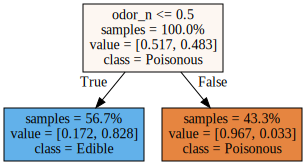

In [34]:

tree = DecisionTreeClassifier(max_depth=1)
# Fit the model
tree.fit(X_train1, y_train)
# Visualize the tree
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train1.columns, class_names=['Poisonous', 'Edible'], filled=True, impurity=False, proportion=True)
graphviz.Source(dot_data)

## Predictions

In [35]:
tree_predictions = tree.predict(X_test1)
tree_predictions1 = tree.predict(X_train1)
pred = pd.DataFrame(tree_predictions,columns=['pred'])
pred1 = pd.DataFrame(tree_predictions1,columns=['pred1'])

### The accuracy of the model on the training set and on the test set

In [36]:
print('The accuracy of the model on the training set:',accuracy_score(y_test, tree_predictions))

The accuracy of the model on the training set: 0.8818461538461538


In [37]:
print('the accuracy of your model on the test set:',accuracy_score(y_train, tree_predictions1))

the accuracy of your model on the test set: 0.8879655278547245


**The model performs better than the base model and it is not overfitting.**

## How successful is the model

### To measure success,confusion matrix will be used.

A confusion matrix is a table that is often used to describe the performance of a classification model
(or “classifier”) on a set of train data and test data for which the true values are known.
It allows the visualization of the performance of an algorithm

**To know which class is represented by which specific column you can use value_counts on either the y_test set
or prediction set.**

### Train data set

In [38]:
y_train.value_counts()

e    3358
p    3140
Name: classes, dtype: int64

In [39]:
pred1['pred1'].value_counts()

p    3682
e    2816
Name: pred1, dtype: int64

In [40]:
con_matrix = pd.DataFrame(confusion_matrix(y_train,tree_predictions1),
                          columns=['Predicted edible (P)', 'Predicted poisenous (N)'], 
                          index=['Actual edible (T)', 'Actual poisenous (F) '])
con_matrix

,Predicted edible (P),Predicted poisenous (N)
Actual edible (T),2723,635
Actual poisenous (F),93,3047


**Prevalence of poisonous mushrooms in the dataset**

In [41]:
prevalance = ((2723+635)/6948)*100
print(prevalance)

48.33045480713874


**Precision**

*We want to know out of all the positive classes predicted how many have we predicted correctly.*
*Numerically,
Precision is defined as the number of true positives divided by the number of true positives 
plus the number of false positives*

In [42]:
precision = ((2723)/(2723+93))*100
print('The precision of positives(edible) on the train set is:',precision)

The precision of positives(edible) on the train set is: 96.69744318181817


In [43]:
negative_predictive_values = ((635)/(635+3047))*100
print('The precision of negatives(poisenous) on the train set is:',negative_predictive_values)


The precision of negatives(poisenous) on the train set is: 17.246061922868005


**Recall**

*Recall expresses the probability to find all relevant instances in a dataset*

In [44]:
recall =  ((2723)/(2723+635))*100
print('The recall of train dataset is:',recall)

The recall of train dataset is: 81.08993448481239


While recall expresses the ability to find all relevant instances in a dataset, 
precision expresses the proportion of the data points our model says was relevant actually were relevant.

**Summary**

In [45]:
print(classification_report(y_train, tree_predictions1, target_names=['Poisonous', 'Edible']))

              precision    recall  f1-score   support

   Poisonous       0.97      0.81      0.88      3358
      Edible       0.83      0.97      0.89      3140

    accuracy                           0.89      6498
   macro avg       0.90      0.89      0.89      6498
weighted avg       0.90      0.89      0.89      6498



### Test data set

In [46]:
y_test.value_counts()

e    850
p    775
Name: classes, dtype: int64

In [47]:
pred['pred'].value_counts()

p    913
e    712
Name: pred, dtype: int64

                | Positive Prediction | Negative Prediction
__________________________________________________________________
Positive Class  | True Positive (TP)  | False Negative (FN)
__________________________________________________________________
Negative Class  | False Positive (FP) | True Negative (TN)

In [48]:

con_matrix = pd.DataFrame(confusion_matrix(y_test, tree_predictions),
                          columns=['Predicted edible (P)', 'Predicted poisenous (N)'], 
                          index=['Actual edible (T)', 'Actual poisenous (F) '])
  
con_matrix

,Predicted edible (P),Predicted poisenous (N)
Actual edible (T),685,165
Actual poisenous (F),27,748


In [49]:
y_test.count()

1625

In [50]:
prevalance = ((685+165)/1625)*100
print(prevalance)

52.307692307692314


**Precision**

In [51]:
precision = ((685)/(685+27))*100
print('The precision of positives on the test set is:',precision)

The precision of positives on the test set is: 96.20786516853933


In [52]:
negative_predictive_values = ((165)/(165+748))*100
print('The precision of negatives on the test set is:',negative_predictive_values)

The precision of negatives on the test set is: 18.072289156626507


**Recall**

In [53]:
recall = ((685)/(685+165))*100
print('The recall of test dataset is:',recall)

The recall of test dataset is: 80.58823529411765


**Summary**

In [54]:
print(classification_report(y_test, tree_predictions, target_names=['Poisonous', 'Edible']))

              precision    recall  f1-score   support

   Poisonous       0.96      0.81      0.88       850
      Edible       0.82      0.97      0.89       775

    accuracy                           0.88      1625
   macro avg       0.89      0.89      0.88      1625
weighted avg       0.89      0.88      0.88      1625



**How might prevalence affect the positive and negative predictive values of a test/model?**

The prevelance might increase or decrease directly with the sample.